In [ ]:
#Importing the Neccessary libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import tensorflow as tf

In [ ]:
import zipfile
import os

# Path to your uploaded zip file
zip_file_path = '/content/archive.zip'

# Destination folder to extract the contents
destination_dir = '/content/dataset_folder'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

# Verify extraction
print(f"Extracted files: {os.listdir(destination_dir)}")


Extracted files: ['archive']


In [ ]:
# Check the contents of the extracted directory
print(f"Contents of extracted folder: {os.listdir(destination_dir)}")

Contents of extracted folder: ['archive']


In [ ]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder, img_size):
    """
    Loads images and labels from a folder.

    Args:
        folder (str): Path to the folder containing images.
        img_size (tuple): Desired size for resizing images (width, height).

    Returns:
        tuple: A tuple containing images, labels, and class names.
    """
    images = []
    labels = []
    class_names = []

    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            class_names.append(class_name)  # Store the class name
            class_index = len(class_names) - 1  # Assign a numerical index to the class
            for filename in os.listdir(class_folder):
                if filename.endswith((".jpg", ".jpeg", ".png")):  # Add more extensions if needed
                    img_path = os.path.join(class_folder, filename)
                    try:
                        img = Image.open(img_path)
                        img = img.resize(img_size)
                        # Ensure all images are converted to RGB
                        img = img.convert('RGB')
                        img = np.array(img)
                        images.append(img)
                        labels.append(class_index)  # Assign the class index as the label
                    except IOError as e:
                        print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels), class_names

In [ ]:
# Update paths to include the 'archive' folder
train_folder = os.path.join(destination_dir, 'archive', 'train')
val_folder = os.path.join(destination_dir, 'archive', 'validation')
test_folder = os.path.join(destination_dir, 'archive', 'test')

# Define img_size as a tuple (width, height)
img_size = (64, 64)  # Example size, adjust as needed

# Now load the dataset
train_images, train_labels, class_names = load_images_from_folder(train_folder, img_size)
val_images, val_labels, _ = load_images_from_folder(val_folder, img_size)
test_images, test_labels, _ = load_images_from_folder(test_folder, img_size)

In [ ]:
print(f"Contents of 'archive': {os.listdir(os.path.join(destination_dir, 'archive'))}")

Contents of 'archive': ['ascii_file_counts.csv', 'validation', 'test', 'train']


In [ ]:
# Reshape images for CNN input
train_images = train_images.reshape(-1, img_size[0], img_size[1], 3) # Unpack the tuple into width and height
val_images = val_images.reshape(-1, img_size[0], img_size[1], 3) # Unpack the tuple into width and height
test_images = test_images.reshape(-1, img_size[0], img_size[1], 3) # Unpack the tuple into width and height

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical

num_classes = len(class_names)
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print(f"Training set shape: {train_images.shape}")
print(f"Validation set shape: {val_images.shape}")
print(f"Test set shape: {test_images.shape}")

Training set shape: (76109, 64, 64, 3)
Validation set shape: (10963, 64, 64, 3)
Test set shape: (21719, 64, 64, 3)


In [ ]:
train_dir = '/content/dataset_folder/archive/train'
valid_dir = '/content/dataset_folder/archive/validation'
test_dir  = '/content/dataset_folder/archive/test'
datasets = [train_dir, valid_dir, test_dir]

In [ ]:
def decode_class_name(class_name) :
    return ''.join(chr(int(c)) for c in class_name.split('_'))

In [ ]:
total_counts = {}
def count_each_class(dataset):
    global total_counts
    class_counts = {}
    for class_name in os.listdir(dataset):
        class_path = os.path.join(dataset, class_name)
        if os.path.isdir(class_path):
            num_samples = len(os.listdir(class_path))
            decode_class = decode_class_name(class_name)
            class_counts[decode_class] = num_samples
            if decode_class in total_counts : total_counts[decode_class] += num_samples
            else : total_counts[decode_class] = num_samples
    return class_counts

In [ ]:
for dataset in datasets :
    classes = count_each_class(dataset)
    print(f"{dataset}",classes)
    print()

/content/dataset_folder/archive/train {'1': 1953, 'G': 1010, 'l': 990, 'X': 956, '#': 106, 'N': 1178, 'i': 1424, 'A': 1346, ';': 156, 'g': 532, 'a': 1553, 'W': 1064, 'F': 1027, '.': 340, '|': 63, '6': 1752, 'U': 1020, 'M': 1038, ':': 200, 'Q': 986, '(': 242, '0': 1864, '5': 1640, "'": 193, 'C': 1150, '+': 102, 'E': 1519, '_': 56, 'Y': 1019, '"': 186, 'h': 693, 'p': 550, 'r': 1195, '{': 51, '/': 181, '8': 1780, 'c': 616, 'v': 388, 's': 1089, 'y': 475, '2': 1794, '=': 177, '[': 77, '7': 1875, 'P': 1123, 'f': 425, '>': 113, 'n': 1334, '&': 72, '%': 133, '<': 117, 'B': 1053, '-': 312, '?': 135, '3': 1869, 'd': 751, 'K': 1052, '9': 1831, 'Z': 1015, 'e': 2073, ')': 251, 'b': 436, 't': 1246, 'O': 1467, 'z': 353, 'w': 475, 'I': 1321, ']': 72, 'S': 1250, '`': 29, ',': 224, 'o': 1433, 'V': 983, '!': 144, 'H': 1080, '$': 134, 'R': 1267, 'ϧ': 3500, 'J': 1029, 'L': 1184, '~': 41, '}': 53, '@': 58, 'k': 389, '4': 1771, 'T': 1210, 'u': 923, 'D': 1087, 'j': 298, 'm': 615, 'x': 324, '*': 89, 'q': 298, 

In [ ]:
check_counts = pd.read_csv('/content/dataset_folder/archive/ascii_file_counts.csv')

In [ ]:
for sample in range(len(check_counts)-1) :
    flag = False
#     print(total_counts[check_counts['Character'][sample]],check_counts['Number of Files'][sample],check_counts['Character'][sample])
    if total_counts[check_counts['Character'][sample]] != check_counts['Number of Files'][sample] :
        flag = True
        print('No match')
if not flag : print('All match')

All match


In [ ]:
def preprocess_data(dataset):
    data,labels = [],[]
    for class_name in os.listdir(dataset):
        class_path = os.path.join(dataset, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = Image.open(image_path)
                resize = image.resize((28, 28))
                gray = resize.convert('L')
                normalize = np.array(gray) / 255.0
                decode_class = decode_class_name(class_name)
                data.append(normalize)
                labels.append(decode_class)
    data = np.array(data)
    labels = np.array(labels)
    dataset_name = [dataset.split('/')][-1][-2]
    print(f"\n{dataset_name} dataset preprocessing completed!!\n")
    np.save(f'{dataset_name}_images.npy', data)
    np.save(f'{dataset_name}_labels.npy', labels)
    print(f'{dataset_name}_images.npy and {dataset_name}_labels.npy saved\n\n\n')

In [ ]:
for dataset in datasets :
    preprocess_data(dataset)


archive dataset preprocessing completed!!

archive_images.npy and archive_labels.npy saved




archive dataset preprocessing completed!!

archive_images.npy and archive_labels.npy saved




archive dataset preprocessing completed!!

archive_images.npy and archive_labels.npy saved





In [ ]:
import os
dataset_folder = '/content/dataset_folder/archive/'
print(f"Contents of the dataset folder: {os.listdir(dataset_folder)}")

Contents of the dataset folder: ['ascii_file_counts.csv', 'validation', 'test', 'train']


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

def decode_class_name(class_name):
    return class_name

def preprocess_data(dataset_path):
    data, labels = [], []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            class_label = decode_class_name(class_name)
            for file_name in os.listdir(class_path):
                image_path = os.path.join(class_path, file_name)
                img = image.load_img(image_path, target_size=(32, 32), color_mode="grayscale")
                img_array = image.img_to_array(img)
                data.append(img_array)
                labels.append(class_label)

    data = np.array(data) / 255.0  # Normalize pixel values to [0, 1]

    # Convert labels to categorical
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = np.array(labels)

    return data, labels

# Now, preprocess the data for both train and test
datasets = ['train', 'test']
for dataset in datasets:
    dataset_path = f'/content/dataset_folder/archive/{dataset}'
    if os.path.isdir(dataset_path):
        print(f"\nProcessing {dataset} dataset...")
        data, labels = preprocess_data(dataset_path)
        np.save(f'{dataset}_images.npy', data)
        np.save(f'{dataset}_labels.npy', labels)
        print(f"{dataset} preprocessing completed, saved as {dataset}_images.npy and {dataset}_labels.npy")
    else:
        print(f"{dataset} folder does not exist.")



Processing train dataset...
train preprocessing completed, saved as train_images.npy and train_labels.npy

Processing test dataset...
test preprocessing completed, saved as test_images.npy and test_labels.npy


In [ ]:
import numpy as np

# Load the preprocessed data
train_data = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')

test_data = np.load('test_images.npy')
test_labels = np.load('test_labels.npy')

print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train data shape: (76109, 32, 32, 1)
Train labels shape: (76109,)
Test data shape: (21719, 32, 32, 1)
Test labels shape: (21719,)


In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU

# Assuming images are 32x32 pixels and grayscale
input_shape = (32, 32, 1)  # Change (1) to (3) if using RGB images

model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=input_shape),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3)),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2)),
    # Apply Global Average Pooling to reduce to a single value per feature map
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # num_classes is the number of character classes
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 94)                  │          96,350 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,118 (1.22 MB)

 Trainable params: 321,118 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(test_data, test_labels)
)

Epoch 1/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.0461 - loss: 4.2585 - val_accuracy: 0.0460 - val_loss: 4.2000
Epoch 2/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0451 - loss: 4.1981 - val_accuracy: 0.0460 - val_loss: 4.1657
Epoch 3/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0646 - loss: 4.0237 - val_accuracy: 0.1544 - val_loss: 3.4185
Epoch 4/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1856 - loss: 3.2355 - val_accuracy: 0.2874 - val_loss: 2.7183
Epoch 5/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3000 - loss: 2.6570 - val_accuracy: 0.3531 - val_loss: 2.4669
Epoch 6/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3629 - loss: 2.4142 - val_accuracy: 0.3920 - val_loss: 2.2723
Epoch 7/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4096 - loss: 2.2096 - val_accuracy: 0.4450 - val_loss: 2.0737
Epoch 8/20
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4638 - loss: 1.9891

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")


679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7044 - loss: 0.9896
Test accuracy: 0.6947833895683289


In [ ]:
import tensorflow as tf
import numpy as np

test_images = tf.image.resize(test_images, (32, 32))  # Resize to 32x32
test_images = tf.image.rgb_to_grayscale(test_images) # Convert to grayscale

# Make predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


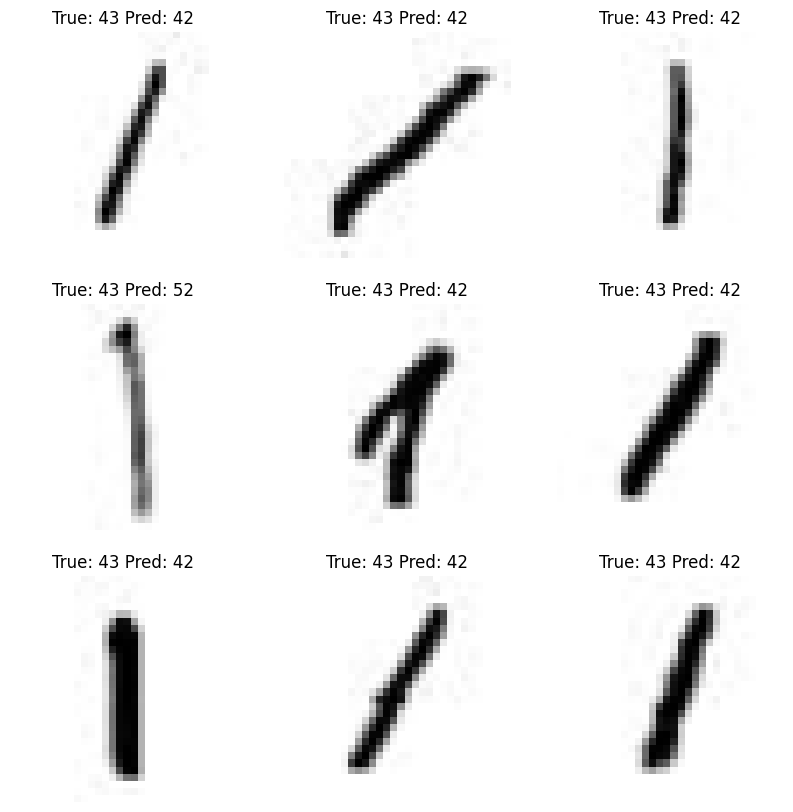

In [ ]:
import matplotlib.pyplot as plt

# Display some test images and predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {test_labels[i]} Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()

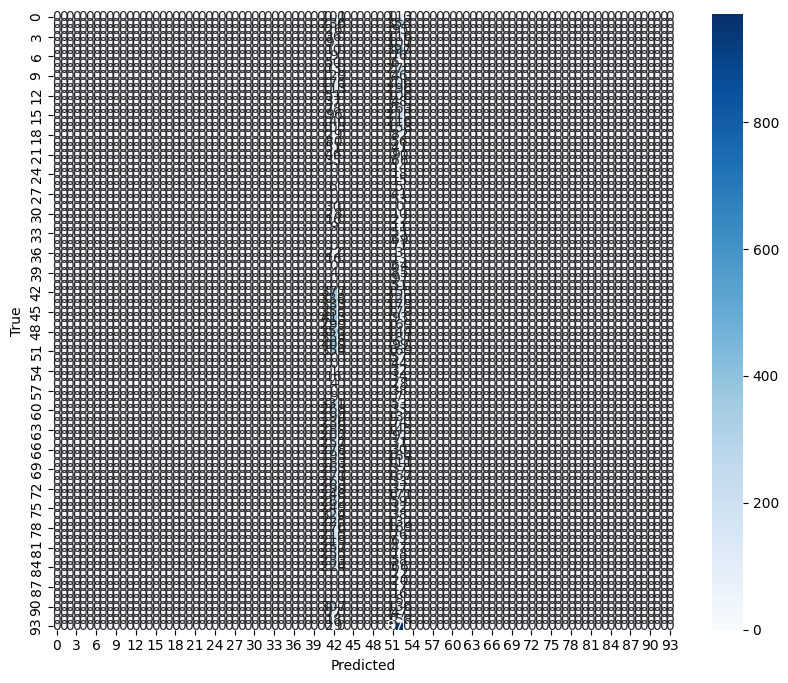

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load the image
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(32, 32), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Get the predicted class name
predicted_class_name = class_names[predicted_class]

# Print the predicted class name
print(f"Predicted class name is: {predicted_class_name}")

Saving 11889.jpg to 11889.jpg
User uploaded file "11889.jpg" with length 819 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class name is: 91
